In [45]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 5

setup_random_seed(RANDOM_SEED)

In [46]:
df = pd.read_csv('data/01_raw/CatData/bigmart/bigmart.csv')
df['Outlet_Size'] = df['Outlet_Size'].fillna('')

In [47]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [48]:
x = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])
y = np.log10(df[['Item_Outlet_Sales']])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [50]:
x_train.shape, x_test.shape

((6818, 10), (1705, 10))

In [51]:
model = catboost.CatBoostRegressor(
    cat_features=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_seed=RANDOM_SEED
)

In [52]:
%time model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5448778	test: 0.5361725	best: 0.5361725 (0)	total: 3.57ms	remaining: 7.13s
1:	learn: 0.5109253	test: 0.5031703	best: 0.5031703 (1)	total: 6.84ms	remaining: 6.84s
2:	learn: 0.4836100	test: 0.4771153	best: 0.4771153 (2)	total: 9.87ms	remaining: 6.57s
3:	learn: 0.4591084	test: 0.4533611	best: 0.4533611 (3)	total: 12.7ms	remaining: 6.34s
4:	learn: 0.4398718	test: 0.4348668	best: 0.4348668 (4)	total: 15.8ms	remaining: 6.32s
5:	learn: 0.4203940	test: 0.4157874	best: 0.4157874 (5)	total: 18.5ms	remaining: 6.15s
6:	learn: 0.4027982	test: 0.3987294	best: 0.3987294 (6)	total: 21.6ms	remaining: 6.15s
7:	learn: 0.3868255	test: 0.3832178	best: 0.3832178 (7)	total: 24.3ms	remaining: 6.05s
8:	learn: 0.3746259	test: 0.3713667	best: 0.3713667 (8)	total: 25.9ms	remaining: 5.73s
9:	learn: 0.3596346	test: 0.3571569	best: 0.3571569 (9)	total: 28.9ms	remaining: 5.74s
10:	learn: 0.3461295	test: 0.3437121	best: 0.3437121 (10)	total: 31.7ms	remaining: 5.73s
11:	learn: 0.3322710	test: 0.3304003	best

160:	learn: -0.0790631	test: -0.0538354	best: -0.0538354 (160)	total: 397ms	remaining: 4.54s
161:	learn: -0.0791154	test: -0.0537547	best: -0.0538354 (160)	total: 399ms	remaining: 4.53s
162:	learn: -0.0791284	test: -0.0537447	best: -0.0538354 (160)	total: 400ms	remaining: 4.51s
163:	learn: -0.0796837	test: -0.0540710	best: -0.0540710 (163)	total: 403ms	remaining: 4.51s
164:	learn: -0.0807669	test: -0.0541947	best: -0.0541947 (164)	total: 406ms	remaining: 4.51s
165:	learn: -0.0807789	test: -0.0541820	best: -0.0541947 (164)	total: 407ms	remaining: 4.49s
166:	learn: -0.0812455	test: -0.0545731	best: -0.0545731 (166)	total: 408ms	remaining: 4.48s
167:	learn: -0.0818796	test: -0.0549988	best: -0.0549988 (167)	total: 411ms	remaining: 4.48s
168:	learn: -0.0821220	test: -0.0548862	best: -0.0549988 (167)	total: 414ms	remaining: 4.48s
169:	learn: -0.0822507	test: -0.0549295	best: -0.0549988 (167)	total: 416ms	remaining: 4.48s
170:	learn: -0.0828451	test: -0.0552209	best: -0.0552209 (170)	total: 

311:	learn: -0.1302216	test: -0.0590327	best: -0.0602252 (288)	total: 794ms	remaining: 4.3s
312:	learn: -0.1309164	test: -0.0589865	best: -0.0602252 (288)	total: 797ms	remaining: 4.29s
313:	learn: -0.1316792	test: -0.0589706	best: -0.0602252 (288)	total: 800ms	remaining: 4.3s
314:	learn: -0.1321572	test: -0.0591418	best: -0.0602252 (288)	total: 803ms	remaining: 4.3s
315:	learn: -0.1322931	test: -0.0591354	best: -0.0602252 (288)	total: 806ms	remaining: 4.3s
316:	learn: -0.1326641	test: -0.0591068	best: -0.0602252 (288)	total: 809ms	remaining: 4.3s
317:	learn: -0.1328285	test: -0.0591340	best: -0.0602252 (288)	total: 813ms	remaining: 4.3s
318:	learn: -0.1336649	test: -0.0590668	best: -0.0602252 (288)	total: 816ms	remaining: 4.3s
319:	learn: -0.1342284	test: -0.0588816	best: -0.0602252 (288)	total: 819ms	remaining: 4.3s
320:	learn: -0.1344213	test: -0.0589263	best: -0.0602252 (288)	total: 822ms	remaining: 4.3s
321:	learn: -0.1346540	test: -0.0590290	best: -0.0602252 (288)	total: 825ms	rem

443:	learn: -0.1786035	test: -0.0513511	best: -0.0602252 (288)	total: 1.19s	remaining: 4.18s
444:	learn: -0.1789236	test: -0.0511968	best: -0.0602252 (288)	total: 1.2s	remaining: 4.19s
445:	learn: -0.1790104	test: -0.0511152	best: -0.0602252 (288)	total: 1.2s	remaining: 4.18s
446:	learn: -0.1792029	test: -0.0510393	best: -0.0602252 (288)	total: 1.2s	remaining: 4.18s
447:	learn: -0.1795949	test: -0.0509380	best: -0.0602252 (288)	total: 1.21s	remaining: 4.18s
448:	learn: -0.1798005	test: -0.0509386	best: -0.0602252 (288)	total: 1.21s	remaining: 4.18s
449:	learn: -0.1799920	test: -0.0509278	best: -0.0602252 (288)	total: 1.21s	remaining: 4.18s
450:	learn: -0.1804494	test: -0.0508926	best: -0.0602252 (288)	total: 1.22s	remaining: 4.18s
451:	learn: -0.1807276	test: -0.0508052	best: -0.0602252 (288)	total: 1.22s	remaining: 4.18s
452:	learn: -0.1809770	test: -0.0507893	best: -0.0602252 (288)	total: 1.22s	remaining: 4.18s
453:	learn: -0.1813770	test: -0.0503328	best: -0.0602252 (288)	total: 1.2

577:	learn: -0.2136066	test: -0.0362419	best: -0.0602252 (288)	total: 1.59s	remaining: 3.92s
578:	learn: -0.2139592	test: -0.0361665	best: -0.0602252 (288)	total: 1.6s	remaining: 3.92s
579:	learn: -0.2143120	test: -0.0358757	best: -0.0602252 (288)	total: 1.6s	remaining: 3.92s
580:	learn: -0.2144180	test: -0.0359057	best: -0.0602252 (288)	total: 1.6s	remaining: 3.91s
581:	learn: -0.2146438	test: -0.0358298	best: -0.0602252 (288)	total: 1.6s	remaining: 3.91s
582:	learn: -0.2148284	test: -0.0357007	best: -0.0602252 (288)	total: 1.61s	remaining: 3.91s
583:	learn: -0.2150298	test: -0.0356275	best: -0.0602252 (288)	total: 1.61s	remaining: 3.9s
584:	learn: -0.2152091	test: -0.0354356	best: -0.0602252 (288)	total: 1.61s	remaining: 3.9s
585:	learn: -0.2153697	test: -0.0353754	best: -0.0602252 (288)	total: 1.62s	remaining: 3.9s
586:	learn: -0.2157280	test: -0.0352476	best: -0.0602252 (288)	total: 1.62s	remaining: 3.9s
587:	learn: -0.2158950	test: -0.0350399	best: -0.0602252 (288)	total: 1.62s	re

713:	learn: -0.2434981	test: -0.0221990	best: -0.0602252 (288)	total: 1.99s	remaining: 3.58s
714:	learn: -0.2439333	test: -0.0216146	best: -0.0602252 (288)	total: 1.99s	remaining: 3.58s
715:	learn: -0.2442497	test: -0.0217021	best: -0.0602252 (288)	total: 2s	remaining: 3.58s
716:	learn: -0.2444130	test: -0.0213406	best: -0.0602252 (288)	total: 2s	remaining: 3.58s
717:	learn: -0.2445170	test: -0.0214168	best: -0.0602252 (288)	total: 2s	remaining: 3.57s
718:	learn: -0.2446851	test: -0.0214521	best: -0.0602252 (288)	total: 2s	remaining: 3.57s
719:	learn: -0.2448954	test: -0.0212934	best: -0.0602252 (288)	total: 2.01s	remaining: 3.57s
720:	learn: -0.2451066	test: -0.0211924	best: -0.0602252 (288)	total: 2.01s	remaining: 3.57s
721:	learn: -0.2454932	test: -0.0211400	best: -0.0602252 (288)	total: 2.01s	remaining: 3.56s
722:	learn: -0.2456829	test: -0.0210945	best: -0.0602252 (288)	total: 2.02s	remaining: 3.56s
723:	learn: -0.2458815	test: -0.0212983	best: -0.0602252 (288)	total: 2.02s	remain

845:	learn: -0.2746804	test: -0.0064698	best: -0.0602252 (288)	total: 2.39s	remaining: 3.25s
846:	learn: -0.2748122	test: -0.0063570	best: -0.0602252 (288)	total: 2.39s	remaining: 3.25s
847:	learn: -0.2751665	test: -0.0062329	best: -0.0602252 (288)	total: 2.39s	remaining: 3.25s
848:	learn: -0.2752624	test: -0.0059985	best: -0.0602252 (288)	total: 2.4s	remaining: 3.25s
849:	learn: -0.2755115	test: -0.0058826	best: -0.0602252 (288)	total: 2.4s	remaining: 3.24s
850:	learn: -0.2758280	test: -0.0057012	best: -0.0602252 (288)	total: 2.4s	remaining: 3.24s
851:	learn: -0.2761454	test: -0.0052616	best: -0.0602252 (288)	total: 2.4s	remaining: 3.24s
852:	learn: -0.2763745	test: -0.0050250	best: -0.0602252 (288)	total: 2.41s	remaining: 3.24s
853:	learn: -0.2764909	test: -0.0049708	best: -0.0602252 (288)	total: 2.41s	remaining: 3.23s
854:	learn: -0.2767390	test: -0.0046016	best: -0.0602252 (288)	total: 2.41s	remaining: 3.23s
855:	learn: -0.2768468	test: -0.0046352	best: -0.0602252 (288)	total: 2.42

977:	learn: -0.2996060	test: 0.0110770	best: -0.0602252 (288)	total: 2.78s	remaining: 2.91s
978:	learn: -0.2997779	test: 0.0113089	best: -0.0602252 (288)	total: 2.78s	remaining: 2.9s
979:	learn: -0.3000012	test: 0.0116863	best: -0.0602252 (288)	total: 2.79s	remaining: 2.9s
980:	learn: -0.3001809	test: 0.0120117	best: -0.0602252 (288)	total: 2.79s	remaining: 2.9s
981:	learn: -0.3003383	test: 0.0120979	best: -0.0602252 (288)	total: 2.79s	remaining: 2.9s
982:	learn: -0.3005691	test: 0.0122890	best: -0.0602252 (288)	total: 2.8s	remaining: 2.89s
983:	learn: -0.3007773	test: 0.0126805	best: -0.0602252 (288)	total: 2.8s	remaining: 2.89s
984:	learn: -0.3008873	test: 0.0129474	best: -0.0602252 (288)	total: 2.8s	remaining: 2.89s
985:	learn: -0.3010595	test: 0.0129541	best: -0.0602252 (288)	total: 2.81s	remaining: 2.88s
986:	learn: -0.3012139	test: 0.0128463	best: -0.0602252 (288)	total: 2.81s	remaining: 2.88s
987:	learn: -0.3014164	test: 0.0130465	best: -0.0602252 (288)	total: 2.81s	remaining: 2

1109:	learn: -0.3198451	test: 0.0333276	best: -0.0602252 (288)	total: 3.18s	remaining: 2.55s
1110:	learn: -0.3200859	test: 0.0334826	best: -0.0602252 (288)	total: 3.18s	remaining: 2.55s
1111:	learn: -0.3202510	test: 0.0337828	best: -0.0602252 (288)	total: 3.19s	remaining: 2.54s
1112:	learn: -0.3204334	test: 0.0339442	best: -0.0602252 (288)	total: 3.19s	remaining: 2.54s
1113:	learn: -0.3206020	test: 0.0338398	best: -0.0602252 (288)	total: 3.19s	remaining: 2.54s
1114:	learn: -0.3208184	test: 0.0339840	best: -0.0602252 (288)	total: 3.19s	remaining: 2.54s
1115:	learn: -0.3209929	test: 0.0348415	best: -0.0602252 (288)	total: 3.2s	remaining: 2.53s
1116:	learn: -0.3211769	test: 0.0350236	best: -0.0602252 (288)	total: 3.2s	remaining: 2.53s
1117:	learn: -0.3212988	test: 0.0352346	best: -0.0602252 (288)	total: 3.2s	remaining: 2.53s
1118:	learn: -0.3214150	test: 0.0353785	best: -0.0602252 (288)	total: 3.21s	remaining: 2.52s
1119:	learn: -0.3214383	test: 0.0354563	best: -0.0602252 (288)	total: 3.2

1240:	learn: -0.3417387	test: 0.0570314	best: -0.0602252 (288)	total: 3.58s	remaining: 2.19s
1241:	learn: -0.3419401	test: 0.0572329	best: -0.0602252 (288)	total: 3.58s	remaining: 2.19s
1242:	learn: -0.3420523	test: 0.0572249	best: -0.0602252 (288)	total: 3.58s	remaining: 2.18s
1243:	learn: -0.3421097	test: 0.0574195	best: -0.0602252 (288)	total: 3.59s	remaining: 2.18s
1244:	learn: -0.3422879	test: 0.0577716	best: -0.0602252 (288)	total: 3.59s	remaining: 2.18s
1245:	learn: -0.3424986	test: 0.0579070	best: -0.0602252 (288)	total: 3.59s	remaining: 2.17s
1246:	learn: -0.3427277	test: 0.0579981	best: -0.0602252 (288)	total: 3.6s	remaining: 2.17s
1247:	learn: -0.3428783	test: 0.0582027	best: -0.0602252 (288)	total: 3.6s	remaining: 2.17s
1248:	learn: -0.3430399	test: 0.0581989	best: -0.0602252 (288)	total: 3.6s	remaining: 2.17s
1249:	learn: -0.3432270	test: 0.0583733	best: -0.0602252 (288)	total: 3.61s	remaining: 2.16s
1250:	learn: -0.3432698	test: 0.0584462	best: -0.0602252 (288)	total: 3.6

1368:	learn: -0.3633211	test: 0.0812097	best: -0.0602252 (288)	total: 3.97s	remaining: 1.83s
1369:	learn: -0.3633764	test: 0.0818213	best: -0.0602252 (288)	total: 3.98s	remaining: 1.83s
1370:	learn: -0.3636319	test: 0.0823135	best: -0.0602252 (288)	total: 3.98s	remaining: 1.82s
1371:	learn: -0.3637447	test: 0.0824887	best: -0.0602252 (288)	total: 3.98s	remaining: 1.82s
1372:	learn: -0.3639034	test: 0.0825720	best: -0.0602252 (288)	total: 3.98s	remaining: 1.82s
1373:	learn: -0.3641423	test: 0.0827808	best: -0.0602252 (288)	total: 3.99s	remaining: 1.82s
1374:	learn: -0.3642797	test: 0.0828139	best: -0.0602252 (288)	total: 3.99s	remaining: 1.81s
1375:	learn: -0.3643070	test: 0.0829764	best: -0.0602252 (288)	total: 3.99s	remaining: 1.81s
1376:	learn: -0.3644252	test: 0.0832289	best: -0.0602252 (288)	total: 4s	remaining: 1.81s
1377:	learn: -0.3646771	test: 0.0837065	best: -0.0602252 (288)	total: 4s	remaining: 1.81s
1378:	learn: -0.3648537	test: 0.0836494	best: -0.0602252 (288)	total: 4s	rem

1497:	learn: -0.3819774	test: 0.1063261	best: -0.0602252 (288)	total: 4.37s	remaining: 1.46s
1498:	learn: -0.3820989	test: 0.1064881	best: -0.0602252 (288)	total: 4.37s	remaining: 1.46s
1499:	learn: -0.3823083	test: 0.1065068	best: -0.0602252 (288)	total: 4.38s	remaining: 1.46s
1500:	learn: -0.3824033	test: 0.1064281	best: -0.0602252 (288)	total: 4.38s	remaining: 1.46s
1501:	learn: -0.3826199	test: 0.1064832	best: -0.0602252 (288)	total: 4.38s	remaining: 1.45s
1502:	learn: -0.3829215	test: 0.1063368	best: -0.0602252 (288)	total: 4.38s	remaining: 1.45s
1503:	learn: -0.3829440	test: 0.1064247	best: -0.0602252 (288)	total: 4.39s	remaining: 1.45s
1504:	learn: -0.3830958	test: 0.1070005	best: -0.0602252 (288)	total: 4.39s	remaining: 1.44s
1505:	learn: -0.3831333	test: 0.1072732	best: -0.0602252 (288)	total: 4.39s	remaining: 1.44s
1506:	learn: -0.3832550	test: 0.1073599	best: -0.0602252 (288)	total: 4.4s	remaining: 1.44s
1507:	learn: -0.3834237	test: 0.1074612	best: -0.0602252 (288)	total: 4

1632:	learn: -0.3991934	test: 0.1263787	best: -0.0602252 (288)	total: 4.77s	remaining: 1.07s
1633:	learn: -0.3993378	test: 0.1266406	best: -0.0602252 (288)	total: 4.77s	remaining: 1.07s
1634:	learn: -0.3993865	test: 0.1266576	best: -0.0602252 (288)	total: 4.78s	remaining: 1.07s
1635:	learn: -0.3995383	test: 0.1267536	best: -0.0602252 (288)	total: 4.78s	remaining: 1.06s
1636:	learn: -0.3996293	test: 0.1270893	best: -0.0602252 (288)	total: 4.78s	remaining: 1.06s
1637:	learn: -0.3996687	test: 0.1272334	best: -0.0602252 (288)	total: 4.78s	remaining: 1.06s
1638:	learn: -0.3997113	test: 0.1272966	best: -0.0602252 (288)	total: 4.79s	remaining: 1.05s
1639:	learn: -0.3997721	test: 0.1275257	best: -0.0602252 (288)	total: 4.79s	remaining: 1.05s
1640:	learn: -0.3998520	test: 0.1278435	best: -0.0602252 (288)	total: 4.79s	remaining: 1.05s
1641:	learn: -0.3999649	test: 0.1279337	best: -0.0602252 (288)	total: 4.8s	remaining: 1.04s
1642:	learn: -0.4001616	test: 0.1279645	best: -0.0602252 (288)	total: 4

1768:	learn: -0.4125991	test: 0.1422026	best: -0.0602252 (288)	total: 5.17s	remaining: 675ms
1769:	learn: -0.4126459	test: 0.1419631	best: -0.0602252 (288)	total: 5.17s	remaining: 672ms
1770:	learn: -0.4128393	test: 0.1426129	best: -0.0602252 (288)	total: 5.18s	remaining: 670ms
1771:	learn: -0.4128903	test: 0.1428010	best: -0.0602252 (288)	total: 5.18s	remaining: 667ms
1772:	learn: -0.4130367	test: 0.1428182	best: -0.0602252 (288)	total: 5.18s	remaining: 664ms
1773:	learn: -0.4131030	test: 0.1430794	best: -0.0602252 (288)	total: 5.19s	remaining: 661ms
1774:	learn: -0.4131388	test: 0.1431031	best: -0.0602252 (288)	total: 5.19s	remaining: 658ms
1775:	learn: -0.4133130	test: 0.1429776	best: -0.0602252 (288)	total: 5.19s	remaining: 655ms
1776:	learn: -0.4134254	test: 0.1431957	best: -0.0602252 (288)	total: 5.2s	remaining: 652ms
1777:	learn: -0.4135477	test: 0.1434763	best: -0.0602252 (288)	total: 5.2s	remaining: 649ms
1778:	learn: -0.4136834	test: 0.1437093	best: -0.0602252 (288)	total: 5.

1904:	learn: -0.4250217	test: 0.1578601	best: -0.0602252 (288)	total: 5.57s	remaining: 278ms
1905:	learn: -0.4251084	test: 0.1579182	best: -0.0602252 (288)	total: 5.57s	remaining: 275ms
1906:	learn: -0.4251716	test: 0.1580627	best: -0.0602252 (288)	total: 5.58s	remaining: 272ms
1907:	learn: -0.4252547	test: 0.1581730	best: -0.0602252 (288)	total: 5.58s	remaining: 269ms
1908:	learn: -0.4253726	test: 0.1584353	best: -0.0602252 (288)	total: 5.58s	remaining: 266ms
1909:	learn: -0.4254135	test: 0.1584373	best: -0.0602252 (288)	total: 5.58s	remaining: 263ms
1910:	learn: -0.4255609	test: 0.1585983	best: -0.0602252 (288)	total: 5.59s	remaining: 260ms
1911:	learn: -0.4256162	test: 0.1585238	best: -0.0602252 (288)	total: 5.59s	remaining: 257ms
1912:	learn: -0.4256389	test: 0.1586220	best: -0.0602252 (288)	total: 5.59s	remaining: 254ms
1913:	learn: -0.4256589	test: 0.1586764	best: -0.0602252 (288)	total: 5.59s	remaining: 251ms
1914:	learn: -0.4258150	test: 0.1590279	best: -0.0602252 (288)	total: 

In [53]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [54]:
%time calculate_nll_catboost(model, x_train, y_train)

CPU times: user 44.8 ms, sys: 2.67 ms, total: 47.4 ms
Wall time: 14 ms


-0.0954564659677007

In [55]:
%time calculate_nll_catboost(model, x_test, y_test)

CPU times: user 34 ms, sys: 10.6 ms, total: 44.6 ms
Wall time: 5.2 ms


-0.06337978177587865

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[1, 3, 5, 7, 8, 9], 
    loss_function="RMSEWithUncertainty",
    depth=2,
    num_trees=500,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 200, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
%time treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=50, batch_size=1024, verbose=True)

0:	learn: 0.5511880	total: 2.57ms	remaining: 1.28s
1:	learn: 0.5175165	total: 4.65ms	remaining: 1.16s
2:	learn: 0.4926270	total: 5.93ms	remaining: 982ms
3:	learn: 0.4722060	total: 7.59ms	remaining: 942ms
4:	learn: 0.4540850	total: 8.66ms	remaining: 857ms
5:	learn: 0.4386631	total: 9.66ms	remaining: 795ms
6:	learn: 0.4239072	total: 10.7ms	remaining: 752ms
7:	learn: 0.4107577	total: 11.6ms	remaining: 715ms
8:	learn: 0.3985946	total: 12.6ms	remaining: 686ms
9:	learn: 0.3873925	total: 13.5ms	remaining: 662ms
10:	learn: 0.3772069	total: 14.6ms	remaining: 647ms
11:	learn: 0.3652557	total: 15.6ms	remaining: 633ms
12:	learn: 0.3538125	total: 16.6ms	remaining: 620ms
13:	learn: 0.3425602	total: 17.6ms	remaining: 611ms
14:	learn: 0.3346287	total: 18.6ms	remaining: 600ms
15:	learn: 0.3239578	total: 19.8ms	remaining: 598ms
16:	learn: 0.3148713	total: 20.7ms	remaining: 588ms
17:	learn: 0.3077560	total: 21.7ms	remaining: 581ms
18:	learn: 0.3016945	total: 22.7ms	remaining: 574ms
19:	learn: 0.2945787	t

176:	learn: -0.0440832	total: 197ms	remaining: 359ms
177:	learn: -0.0441283	total: 198ms	remaining: 357ms
178:	learn: -0.0443478	total: 199ms	remaining: 356ms
179:	learn: -0.0452443	total: 200ms	remaining: 356ms
180:	learn: -0.0452885	total: 201ms	remaining: 354ms
181:	learn: -0.0455946	total: 202ms	remaining: 353ms
182:	learn: -0.0457226	total: 203ms	remaining: 352ms
183:	learn: -0.0457434	total: 204ms	remaining: 351ms
184:	learn: -0.0459422	total: 205ms	remaining: 350ms
185:	learn: -0.0471269	total: 207ms	remaining: 349ms
186:	learn: -0.0471352	total: 207ms	remaining: 347ms
187:	learn: -0.0478369	total: 209ms	remaining: 346ms
188:	learn: -0.0484806	total: 210ms	remaining: 345ms
189:	learn: -0.0486656	total: 211ms	remaining: 344ms
190:	learn: -0.0488155	total: 212ms	remaining: 343ms
191:	learn: -0.0494828	total: 213ms	remaining: 342ms
192:	learn: -0.0501332	total: 215ms	remaining: 341ms
193:	learn: -0.0509951	total: 216ms	remaining: 340ms
194:	learn: -0.0511491	total: 217ms	remaining:

347:	learn: -0.0804791	total: 391ms	remaining: 171ms
348:	learn: -0.0806550	total: 393ms	remaining: 170ms
349:	learn: -0.0806709	total: 393ms	remaining: 169ms
350:	learn: -0.0807929	total: 395ms	remaining: 168ms
351:	learn: -0.0810867	total: 396ms	remaining: 166ms
352:	learn: -0.0812333	total: 397ms	remaining: 165ms
353:	learn: -0.0812722	total: 398ms	remaining: 164ms
354:	learn: -0.0814409	total: 399ms	remaining: 163ms
355:	learn: -0.0814673	total: 401ms	remaining: 162ms
356:	learn: -0.0815040	total: 402ms	remaining: 161ms
357:	learn: -0.0815245	total: 403ms	remaining: 160ms
358:	learn: -0.0816556	total: 404ms	remaining: 159ms
359:	learn: -0.0816598	total: 405ms	remaining: 158ms
360:	learn: -0.0817616	total: 407ms	remaining: 157ms
361:	learn: -0.0821357	total: 408ms	remaining: 155ms
362:	learn: -0.0821577	total: 409ms	remaining: 154ms
363:	learn: -0.0822090	total: 410ms	remaining: 153ms
364:	learn: -0.0823669	total: 412ms	remaining: 152ms
365:	learn: -0.0825136	total: 413ms	remaining:

val loss: 0.7763963341712952
train loss: 0.15997019410133362
val loss: 0.1947130709886551
train loss: -0.035521384328603745
val loss: -0.03277711942791939
train loss: -0.032106999307870865
val loss: 0.012149889022111893
train loss: -0.05155658721923828
val loss: -0.026738250628113747
train loss: -0.05705524608492851
val loss: -0.04440178722143173
train loss: -0.0679236426949501
val loss: -0.0477323904633522
train loss: -0.07389277964830399
val loss: -0.040851086378097534
train loss: -0.07860418409109116
val loss: -0.0454840362071991
train loss: -0.08493022620677948
val loss: -0.05475200340151787
train loss: -0.09476008266210556
val loss: -0.062177348881959915
train loss: -0.10756786167621613
val loss: -0.07206404954195023
train loss: -0.1234990730881691
val loss: -0.08863773941993713
train loss: -0.12292774021625519
val loss: -0.08106128871440887
train loss: -0.15034012496471405
val loss: -0.08475193381309509
train loss: -0.13842865824699402
val loss: -0.08148043602705002
train loss: -

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f9ce53f3c50>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f9ce53f33c8>)

In [14]:
%time calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

CPU times: user 7.39 s, sys: 360 ms, total: 7.75 s
Wall time: 2.39 s


-0.22438736

In [15]:
%time calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

CPU times: user 4.11 s, sys: 127 ms, total: 4.23 s
Wall time: 646 ms


-0.14863867

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

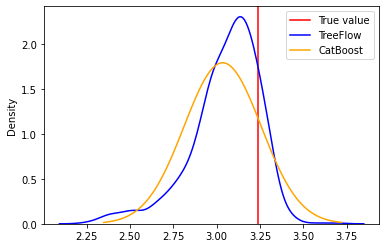

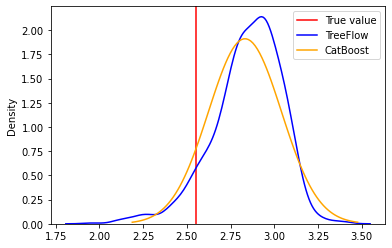

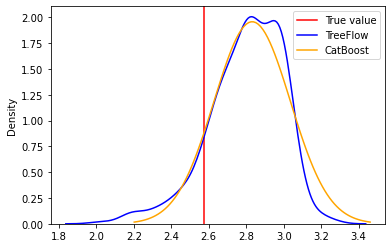

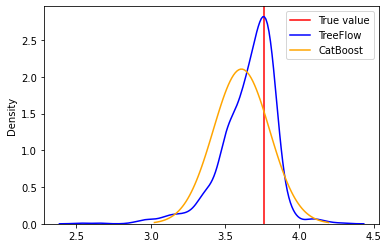

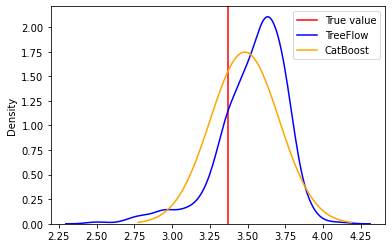

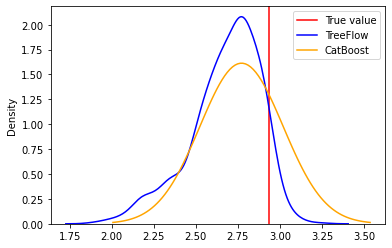

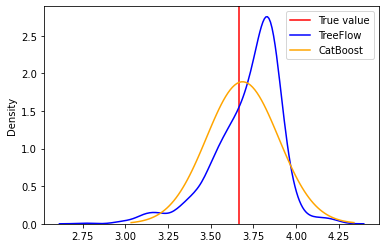

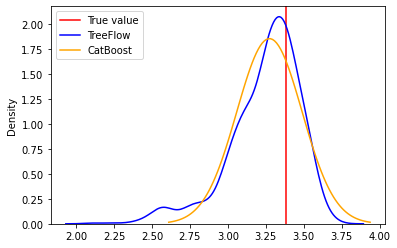

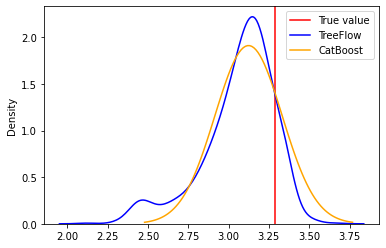

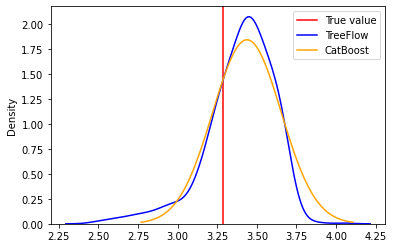

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()